# Functions

In [1]:
from tcc_markov_chain.base_simulation import Simulation
from tcc_markov_chain.simulations import MarkovChain, PeriodicDirectSampling
from typing import List
from tcc_markov_chain.systems import HDPeriodic,DiskSystem
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# observables
from tcc_markov_chain.observables.hard_disk import particle_density, rdf

# Functions

In [3]:
class RDF():
    def __init__(
            self,
            box_size,
            n_bins=10,
        ):
        # self.system=system
        self.n_bins=n_bins
        self.bin_size = box_size / (2*n_bins)
        self.bins =np.zeros(n_bins+1)

    def eval(self, system:DiskSystem):
        distances = system.calculate_relative_positions()
        distances = np.linalg.norm(distances,axis=1)
        for d in distances:
            # print(d//self.bin_size, d, self.bin_size)
            if int(d//self.bin_size)==11:
                print(distances, system.positions)
            self.bins[int(d//self.bin_size)]+=2

        return True

In [19]:
class ProbabilityDensityPosition():
    def __init__(self, sim:Simulation,bin_size=1):
        self.box_dimension = sim.system.box_dimension
        self.bin_size = bin_size
        self.n_bins = self.box_dimension // bin_size
        self.bins = np.zeros(self.n_bins,dtype=float)
        self.steps = 0

    def evaluate(self,sys:DiskSystem):
        idx = (sys.positions[1] // self.bin_size).astype(int)
        self.bins[idx[0],idx[1]]+=1
        
        self.steps+=1
        return self.bins
    
    def normalize_results(self):
        return self.bins / self.steps

# Main

## Direct sampling - 2 particle problem

2025-07-16 23:12:53,938 - INFO - creting system with 2 particles of radii 0.65
2025-07-16 23:12:53,939 - INFO - density: 0.026546457922833753, box size [10 10]
2025-07-16 23:12:53,939 - INFO - system created


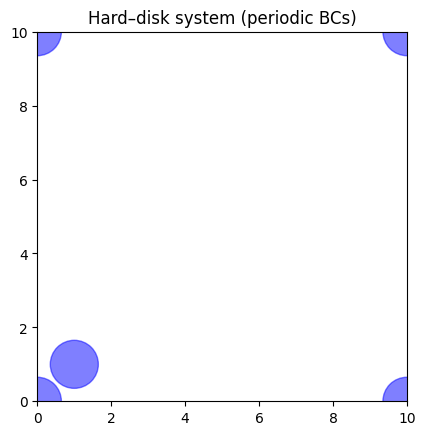

In [ ]:
box_size=2
n_particles=2
particle_radius=0.65
n_steps=int(1e3)
positions = np.array([[0,0],[1.,1]],dtype=float)
sys = HDPeriodic(particle_radius=particle_radius,n_particles=n_particles,positions=positions,box_size=10)
sys.plot_system()

In [36]:
sim = PeriodicDirectSampling(deepcopy(sys))
sim.system.positions
sim_pd = ProbabilityDensityPosition(sim,bin_size=2)
sim_run = sim.run(sim_pd.evaluate,n_steps=n_steps)

for step in sim_run:
    continue

100%|██████████| 1000/1000 [00:00<00:00, 11696.43it/s]


In [37]:
hist = sim_pd.normalize_results()
print(hist.mean())
print(hist.std())

0.04
0.006026607669327745


In [38]:
hist.round(3)

array([[0.046, 0.038, 0.045, 0.036, 0.041],
       [0.048, 0.031, 0.044, 0.047, 0.04 ],
       [0.039, 0.042, 0.039, 0.038, 0.026],
       [0.024, 0.036, 0.045, 0.04 , 0.043],
       [0.046, 0.04 , 0.048, 0.038, 0.04 ]])

## Markov Chain/Direct sampling Probabilitie density

2025-07-16 23:06:11,748 - INFO - creting system with 4 particles of radii 1
2025-07-16 23:06:11,749 - INFO - density: 0.5026548245743669, box size [5 5]
2025-07-16 23:06:11,750 - INFO - system created


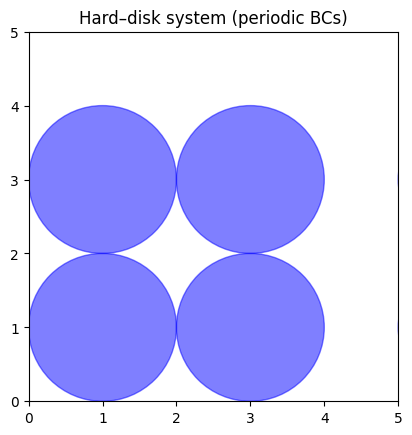

In [9]:
#Defining system
box_size=5
n_particles=4
particle_radius=1
sys = HDPeriodic(box_size=box_size,particle_radius=particle_radius,n_particles=n_particles,fast_initial=True)
sys.plot_system()

In [10]:
def run_simulation(sim,n_steps):
    evaluator = ProbabilityDensityPosition(sim,n_bins=10)
    sim_run = sim.run(eval_fn=evaluator.evaluate,n_steps=n_steps)
    for step in sim_run:
        continue
    hist = evaluator.normalize_results()
    print(hist.mean())
    print(hist.std())
    


In [11]:
#defining markov chain simualtion
n_steps=int(1e6)
sim_mc = MarkovChain(system=deepcopy(sys),delta_x=10*particle_radius)
run_simulation(sim_mc,n_steps)

 15%|█▍        | 147194/1000000 [00:02<00:13, 65026.65it/s]


KeyboardInterrupt: 

In [ ]:
x,y = sys.rng.integers(0,[10,5],2)
x,y

(np.int64(5), np.int64(2))

In [ ]:
test = np.array([10,20])
r = 1
test // (2*r)

array([ 5, 10])

In [ ]:
sys.rng.uniform(0,2,2)

array([0.45447744, 1.10916957])

In [ ]:
sys.rng.uniform([10,0],np.array([40,20]),2)

array([11.91451768, 16.55262344])

In [ ]:
np.array([2,3])**2

array([4, 9])

In [ ]:
# Defining direct sampling simulations
n_steps=int(1e3)
sim_ds = PeriodicDirectSampling(system=deepcopy(sys))
run_simulation(sim_ds,n_steps)

100%|██████████| 1000/1000 [00:12<00:00, 82.09it/s]

0.01
0.0030659419433511784


In [ ]:
[1,2]<1

TypeError: '<' not supported between instances of 'list' and 'int'

### Phase transition

In [ ]:
box_size = 10
particle_radius=0.6
n_particles=20
n_steps = int(1e5)
n_bins=int(50)

sys = HardDiskSystem(box_size=box_size, particle_radius=particle_radius, n_particles=n_particles)
sim_mc = MarkovChain(system=deepcopy(sys),delta_x=particle_radius/2)

bin_size = sim_mc.sys.box_size / (2*n_bins)
bins = np.linspace(0, sim.sys.box_size/2, n_bins + 1)
for step in sim_mc.run(eval_fn=lambda x: rdf(x,n_bins=n_bins),n_steps=n_steps):
    bins+=step

#ploting
density = n_particles / (box_size ** 2)
bins_centers = (np.linspace(0, sim.sys.box_size/2, n_bins + 1) * bin_size) + (bin_size / 2)
bins_normalization = (2 * np.pi * bins_centers * bin_size * density * n_particles * n_steps)
bins /= bins_normalization
fig, axes = plt.subplots(1,2,figsize=(20,10))
axes[0].plot(bins_centers, bins, linestyle='-')

NameError: name 'HardDiskSystem' is not defined